In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [10]:
file_list

['../data/raw\\1_2025-04-17_20-58.csv',
 '../data/raw\\1_2025-06-13_16-45.csv',
 '../data/raw\\1_2025-06-13_16-54.csv',
 '../data/raw\\1_2025-06-13_18-10.csv',
 '../data/raw\\1_2025-06-13_18-21.csv',
 '../data/raw\\1_2025-06-13_18-48.csv',
 '../data/raw\\1_2025-06-13_18-53.csv',
 '../data/raw\\1_2025-06-13_18-57.csv',
 '../data/raw\\1_2025-06-13_19-03.csv',
 '../data/raw\\1_2025-06-13_19-04.csv',
 '../data/raw\\1_2025-06-16_20-44.csv']

In [11]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0)

In [12]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

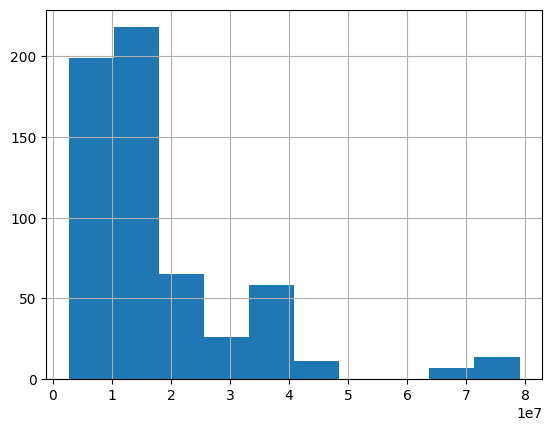

In [13]:
new_dataframe['price'].hist()

In [14]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

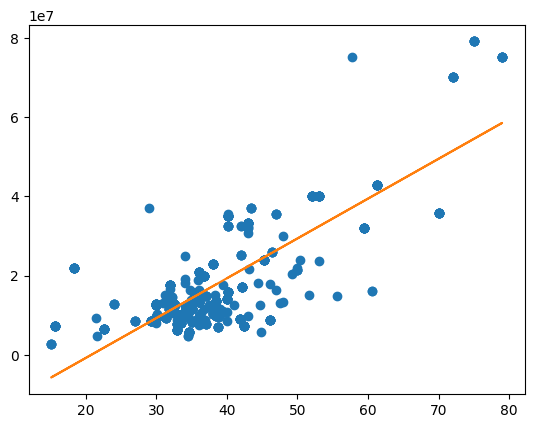

In [15]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [16]:
new_df.to_csv('../data/processed/train.csv', index=False)